In [16]:

from google.colab import files
uploaded = files.upload()


Saving Advertising.csv to Advertising (1).csv


In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:

df = pd.read_csv("Advertising.csv")

df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:

df = df.drop(columns=['Unnamed: 0'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:

df.isnull().sum()


,0
TV,0
Radio,0
Newspaper,0
Sales,0


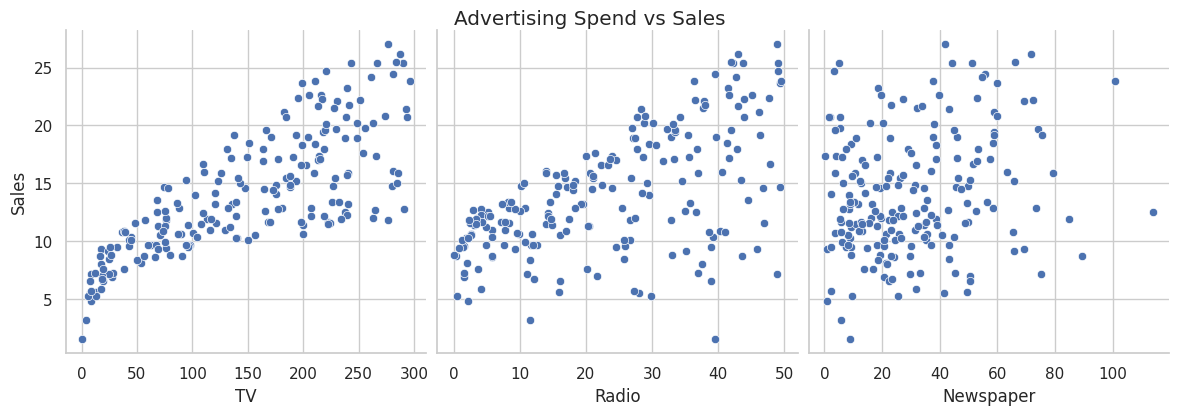

In [21]:

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.show()


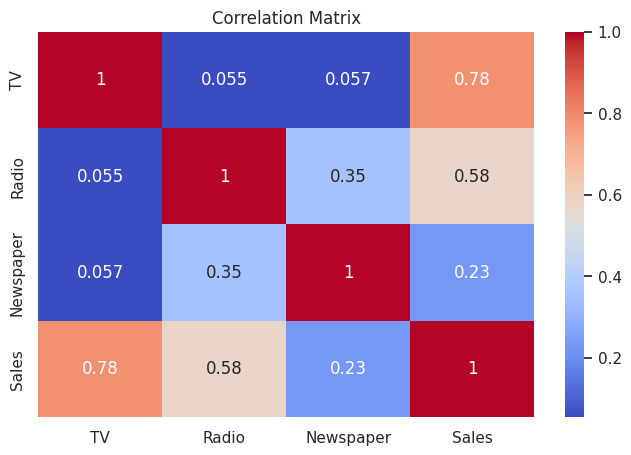

In [22]:

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [23]:

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Mean Squared Error: 3.1740973539761033
R² Score: 0.899438024100912


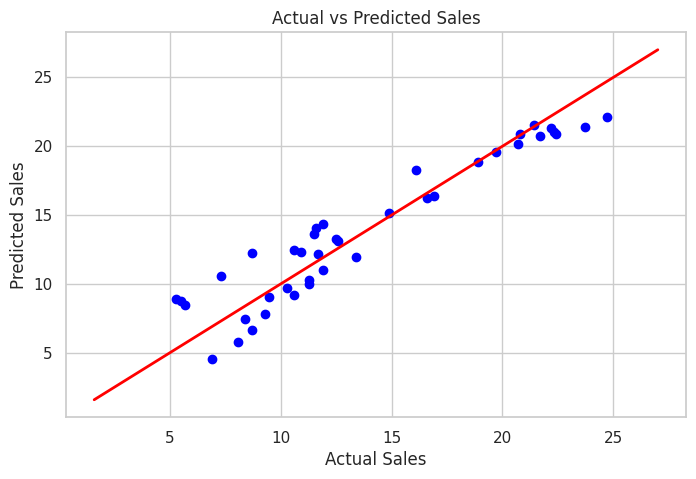

In [25]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


In [26]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Impact of Advertising Channels on Sales:\n")
print(importance)


Impact of Advertising Channels on Sales:

     Feature  Coefficient
1      Radio     0.189195
0         TV     0.044730
2  Newspaper     0.002761


In [27]:

print("/Insight:")
print("→ TV and Radio have the strongest positive impact on sales.\n"
      "→ Newspaper has a minimal effect. Consider optimizing ad spend for maximum ROI.\n"
      "→ These insights help form effective business marketing strategies.")


/Insight:
→ TV and Radio have the strongest positive impact on sales.
→ Newspaper has a minimal effect. Consider optimizing ad spend for maximum ROI.
→ These insights help form effective business marketing strategies.
